In [1]:
import pandas as pd
data = {
    'City': ['Kathmandu', 'Dharan', 'Biratnagar'],
    'Population': [1500000, 200000, 500000]
}

df = pd.DataFrame(data)
print(df.head())

         City  Population
0   Kathmandu     1500000
1      Dharan      200000
2  Biratnagar      500000


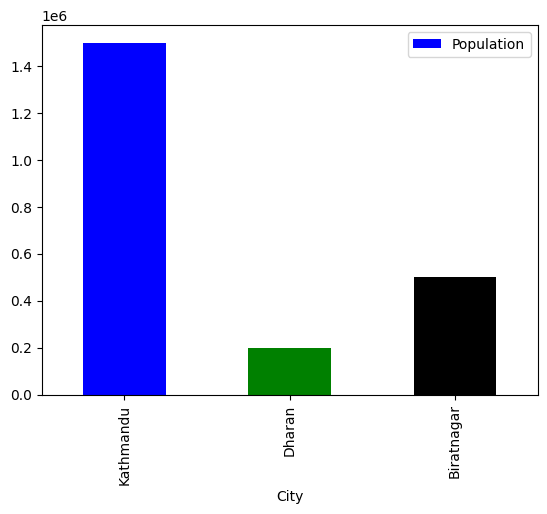

In [9]:
import matplotlib.pyplot as plt
df.plot.bar(x='City', y='Population', color=['blue', 'green', 'black'])
plt.show()

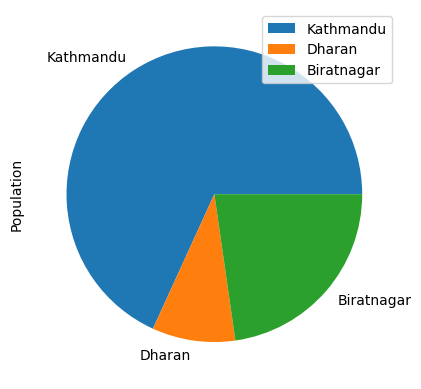

In [15]:
df.plot.pie(y='Population', labels=df['City'])
plt.show()

# Merge Operation

In [17]:
# Merging dataframes
df_students = pd.DataFrame({
    'StudentID': [1,2,3],
    'Name': ['Ram', 'Sita', 'Hari']
})
df_marks = pd.DataFrame({
    'StudentID': [1,2,4],
    'Marks': [86, 45, 88]
})

print(df_students)
print(df_marks)

   StudentID  Name
0          1   Ram
1          2  Sita
2          3  Hari
   StudentID  Marks
0          1     86
1          2     45
2          4     88


In [19]:
merged_inner = pd.merge(df_students, df_marks, on='StudentID', how='inner')
print(merged_inner)

   StudentID  Name  Marks
0          1   Ram     86
1          2  Sita     45


In [20]:
print(merged_inner)
merged_left = pd.merge(df_students, df_marks, on='StudentID', how='left')
print(merged_left)
merged_right = pd.merge(df_students, df_marks, on='StudentID', how='right')
print(merged_right)
merged_outer = pd.merge(df_students, df_marks, on='StudentID', how='outer')
print(merged_outer)

   StudentID  Name  Marks
0          1   Ram     86
1          2  Sita     45
   StudentID  Name  Marks
0          1   Ram   86.0
1          2  Sita   45.0
2          3  Hari    NaN
   StudentID  Name  Marks
0          1   Ram     86
1          2  Sita     45
2          4   NaN     88
   StudentID  Name  Marks
0          1   Ram   86.0
1          2  Sita   45.0
2          3  Hari    NaN
3          4   NaN   88.0


# Join Operation

In [24]:
# Join Operations
df_A = pd.DataFrame({
    'Temperature':[20, 22, 24]
}, index=['Day1', 'Day2', 'Day3'])
df_B = pd.DataFrame({
    'Humidity': [60, 50, 70],
}, index=['Day1', 'Day2', 'Day4'])

In [28]:
joined_df_left = df_A.join(df_B, how='left')
print(joined_df_left)
joined_df_right = df_A.join(df_B, how='right')
print(joined_df_right)
joined_df_inner = df_A.join(df_B, how='inner')
print(joined_df_inner)
joined_df_outer = df_A.join(df_B, how='outer')
print(joined_df_outer)
joined_df_cross = df_A.join(df_B, how='cross')
print(joined_df_cross)

      Temperature  Humidity
Day1           20      60.0
Day2           22      50.0
Day3           24       NaN
      Temperature  Humidity
Day1         20.0        60
Day2         22.0        50
Day4          NaN        70
      Temperature  Humidity
Day1           20        60
Day2           22        50
      Temperature  Humidity
Day1         20.0      60.0
Day2         22.0      50.0
Day3         24.0       NaN
Day4          NaN      70.0
   Temperature  Humidity
0           20        60
1           20        50
2           20        70
3           22        60
4           22        50
5           22        70
6           24        60
7           24        50
8           24        70


# Reshaping

In [31]:
df_wide = pd.DataFrame({
    'Name': ['Prabin', 'Nishant'],
    'Maths': [80, 85],
    'Science': [77, 76]
})
print(df_wide)

      Name  Maths  Science
0   Prabin     80       77
1  Nishant     85       76


In [33]:
df_long = pd.melt(df_wide, id_vars=['Name'], var_name='Subject', value_name='Score')
print(df_long)

      Name  Subject  Score
0   Prabin    Maths     80
1  Nishant    Maths     85
2   Prabin  Science     77
3  Nishant  Science     76


In [34]:
df_original = df_long.pivot(
    index='Name',
    columns='Subject',
    values='Score'
)
print(df_original)

Subject  Maths  Science
Name                   
Nishant     85       76
Prabin      80       77


In [35]:
df_stacked = df_long.stack()
print(df_stacked)

0  Name        Prabin
   Subject      Maths
   Score           80
1  Name       Nishant
   Subject      Maths
   Score           85
2  Name        Prabin
   Subject    Science
   Score           77
3  Name       Nishant
   Subject    Science
   Score           76
dtype: object


In [36]:
df_unstacked = df_stacked.unstack()
print(df_unstacked)

      Name  Subject Score
0   Prabin    Maths    80
1  Nishant    Maths    85
2   Prabin  Science    77
3  Nishant  Science    76


In [37]:
df_pivot_tbl = pd.pivot_table(
    df_long,
    index='Name',
    columns='Subject',
    values='Score',
    aggfunc='mean'
)
print(df_pivot_tbl)

Subject  Maths  Science
Name                   
Nishant   85.0     76.0
Prabin    80.0     77.0


# Handling missing values

In [45]:
df = pd.read_csv("data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     4 non-null      int64  
 1   Name     3 non-null      object 
 2   Address  3 non-null      object 
 3   Age      3 non-null      float64
 4   Gender   2 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes
None


In [46]:
#Check for missing values
df.isna().sum()

Roll       0
Name       1
Address    1
Age        1
Gender     2
dtype: int64

In [47]:
#drop row with any missing value
new_df = df.dropna()
print(new_df)

   Roll            Name        Address   Age Gender
0     1  Prabin Acharya        Jhapa-5  21.0   male
1     2  Prabin Bashyal  CharKoseJhadi  20.0  other


In [49]:
#drop column with missing value
new_df_1 = df.dropna(axis=1)
print(new_df_1)

   Roll
0     1
1     2
2     3
3     4


In [51]:
# fill with constant value
df['Address'] = df['Address'].fillna("Unknown")
df

,Roll,Name,Address,Age,Gender
0,1,Prabin Acharya,Jhapa-5,21.0,male
1,2,Prabin Bashyal,CharKoseJhadi,20.0,other
2,3,Pritam,Unknown,16.0,NaN
3,4,NaN,Syangja,NaN,NaN


In [ ]:
# fill with 
